In [1]:
from sim_pipeline.Sources.supernovae import delaytimedistribution
from sim_pipeline.Sources.supernovae import volumetricSNrate
from sim_pipeline.Sources.supernovae import supernovatotal
import astropy.units as u
delaytimedistribution(.5)

ModuleNotFoundError: No module named 'sim_pipeline.Sources.source_base'

[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19 0.21 0.23 0.25 0.27
 0.29 0.31 0.33 0.35 0.37 0.39 0.41 0.43 0.45 0.47 0.49 0.51 0.53 0.55
 0.57 0.59]


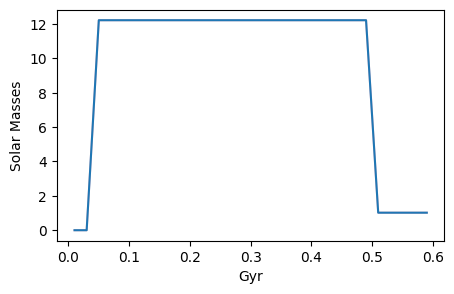

In [6]:
"graphing delay time distribution piecewise as a function of time"
from sim_pipeline.Sources.supernovae import delaytimedistribution
import numpy as np
import astropy.units as u
x=np.arange(.01,.6,.02)
print(x)
from matplotlib import pyplot as plt
plt.figure(figsize=(5,3))
y=delaytimedistribution(x)
plt.xlabel('Gyr')
plt.ylabel('Solar Masses')
plt.plot(x, y, '-', color='pink')
plt.plot(x,y)
plt.show()


In [3]:
"graphing Volumetric SuperNova Rate as a function of redshift"
from sim_pipeline.Sources.supernovae import volumetricSNrate
from matplotlib import pyplot as plt
import numpy as np
x = np.arange(1, 6, 1)
print(x)
"test array of redshift" 
from matplotlib import pyplot as plt
plt.figure(figsize=(5,3))
y = volumetricSNrate(x)
plt.plot(x, y, '-', color='pink')
plt.plot(x,y)
plt.show()

[1 2 3 4 5]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 500x300 with 0 Axes>

In [3]:
def delaytimedistribution(x):
    import numpy as np
    import astropy.units as u
    if isinstance(x, (int, float)):
        if x<0.04:
            return 0*u.Gyr
        elif x<0.5:
            return 12.2196*u.Gyr
        else:
            return 1.02*u.Gyr
    elif isinstance(x, np.ndarray):
        result = np.where(x < 0.04, 0, np.where(x < 0.5, 12.2196, 1.02))
        return result * u.Gyr
    else:
        raise ValueError("input must be single value or numpy array")

def volumetricSNrate(t):
    from astropy.cosmology import Planck13, z_at_value
    import astropy.units as u
    t=np.atleast_1d(t)
    z=z_at_value(Planck13.age, t*u.Gyr)
    "correspondance between time and redshift using z_at_value"
    def StarFormationHist(z):
        s=.15*(1+z)**2.7/(1+((1+z)/2.9)**5.6)
        return s
    "describes the cosmic star formation rates based on UV and IR band observations"
    " below is integration to obtain SNe volumetric rate at some redshift"
    import scipy.integrate as integrate
    result_delta=np.empty_like(t)
    val_min = 0
    SNVolumetricIntegral = lambda x: StarFormationHist(z)*delaytimedistribution(x).value
    for i,val in enumerate(t):
        integral_result,_=integrate.quad(SNVolumetricIntegral,val_min,val)
        result_delta[i]=integral_result
        val_min = val
    result = np.cumsum(result_delta)
    return result

import numpy as np
x = np.arange(.5, 3, .5)
print(x)
"test array of redshift" 
from matplotlib import pyplot as plt
plt.figure(figsize=(5,3))
y = volumetricSNrate(x)
plt.xlabel('Gyr')
plt.ylabel('volume')
plt.plot(x, y, '-', color='pink')
plt.plot(x,y)
plt.show()
volumetricSNrate(x)


[0.5 1.  1.5 2.  2.5]


TypeError: only dimensionless scalar quantities can be converted to Python scalars

<Figure size 500x300 with 0 Axes>

In [53]:
def delaytimedistribution(x):
    import numpy as np
    import astropy.units as u
    if isinstance(x, (int, float)):
        if x<0.04:
            return 0*u.Gyr
        elif x<0.5:
            return 12.2196*u.Gyr
        else:
            return 1.02*u.Gyr
    elif isinstance(x, np.ndarray):
        result = np.where(x < 0.04, 0, np.where(x < 0.5, 12.2196, 1.02))
        return result * u.Gyr
    else:
        raise ValueError("input must be single value or numpy array")
def volumetricSNrate(t):
    from astropy.cosmology import Planck13, z_at_value
    import astropy.units as u
    import scipy.integrate as integrate
    t = np.atleast_1d(t)
    result = np.empty_like(t)
    for i, val in enumerate(t):
        z_vals = np.linspace(0, val, 51)  # Split the interval into 50 subintervals
        integrals = np.zeros(len(z_vals) - 1)
        for j in range(len(z_vals) - 1):
            z1, z2 = z_vals[j], z_vals[j + 1]
            StarFormationHist = 0.15 * (1 + z_vals[j]) ** 2.7 / (
                    1 + ((1 + z_vals[j]) / 2.9) ** 5.6)
            SNVolumetricIntegral = lambda x: StarFormationHist * delaytimedistribution(x).value
            integral_result, _ = integrate.quad(SNVolumetricIntegral, z1, z2)
            integrals[j] = integral_result
        result[i] = np.sum(integrals)
    return result*u.Gyr
import numpy as np
x=np.arange(1,10,1)
volumetricSNrate(x)

<Quantity [1., 3., 4., 4., 5., 5., 5., 5., 5.] Gyr>